# Full Animation: PID Throttle Control and Stanley Steering

In this exercise, you will be developing a complete animation of an autonomous car that utilizes **PID control** for throttle and **Stanley control** for steering. You'll implement the missing pieces of the code and adjust parameters to improve performance.

A very simple point mass model has been implemented as the car for initial testing.

## Objectives:
1. Implement **PID throttle control** to maintain a desired speed.
2. Implement **Stanley steering** to follow a predefined path.
3. Tune the Stanley controller to achieve better path tracking.
4. Visualize the system's behavior using an animation.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

Initially to get started load the map(waypoints) and plot to see the path you are trying to traverse

(Optional)
Add the Cones for Visualisation to make the animation look prettier

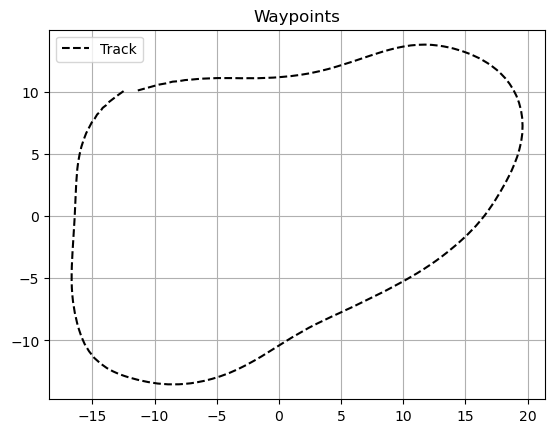

In [29]:

waypoints = np.load('../checkpoint2_optimization_velocity/waypoints.npy')
# This is the map which was obtained from optimising the waypoints

plt.plot(waypoints[:,0], waypoints[:,1], 'k--', label="Track")
plt.axis("equal")
plt.title("Waypoints")
plt.legend()
plt.grid()
plt.show()

#### Implement the car model
Currently the skeleton code has a kinematic bicylce model already implemented for you :)

##### Bonus:

After you implement the whole animation using this model you can try to implement the dynamic bicycle model you learned in AISD module

In [25]:
class Vehicle:
    def __init__(self, x=0, y=0, yaw=0 , v=0.0, L=2.5):  # Initial position, yaw, velocity, and wheelbase

        self.x = x              #  IMP ! : Change the initial pose of the car to determine the starting position
        self.y = y  
        self.yaw = yaw
        self.v = v
        self.L = L  # Wheelbase

    def update(self, throttle, delta, dt=0.1):
        self.x += self.v * np.cos(self.yaw) * dt
        self.y += self.v * np.sin(self.yaw) * dt
        self.yaw += self.v / self.L * np.tan(delta) * dt
        self.v += throttle * dt
        self.v = max(0.0, self.v)  # No reverse


### Implement Throttle and Steering control
 - Implement a PID controller for throttle to follow the velocity profile you created earlier
 - Implement the stanley controller function you created in the previous notebook for steering control

In [26]:
def compute_control(vehicle, waypoints, last_target_idx, k=5.0, k_soft=1e-2):
    """

    Args:
        vehicle: Vehicle object
        waypoints: Nx2 array
        last_target_idx: previously selected waypoint index
        k: control gain for Stanley
        k_soft: softening term to avoid division by zero

    Returns:
        throttle: float
        steer: float
        target_idx: int
    """
    

    # Limit steering to realistic bounds
    max_steer = np.radians(30)
    steer = # use imported stanley function here

    # Throttle control (simple proportional control or replace with PID)
    target_v = # import your velocity profile here
    # You will have to provide a single value of velocity here. Think how you will select the number from the velocity profile you had created
    throttle = # Make a pid function in utility.py and use it here

    return throttle, steer, target_idx


In [ ]:

vehicle = Vehicle()
history = {'x': [], 'y': []}
target_idx = 0

fig, ax = plt.subplots(figsize=(6,6))
# ax.set_xlim(-12, 12)
# ax.set_ylim(-12, 12)
track_line, = ax.plot(waypoints[:,0], waypoints[:,1], 'k--')
car_dot, = ax.plot([], [], 'bo', markersize=6)
path_line, = ax.plot([], [], 'b-', linewidth=1)

def init():
    car_dot.set_data([], [])
    path_line.set_data([], [])
    return car_dot, path_line

def animate(i):
    global target_idx
    throttle, steer, target_idx = compute_control(vehicle, waypoints, target_idx)
    vehicle.update(throttle, steer)

    history['x'].append(vehicle.x)
    history['y'].append(vehicle.y)

    car_dot.set_data(vehicle.x, vehicle.y)
    path_line.set_data(history['x'], history['y'])
    return car_dot, path_line

ani = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=300, interval=50, blit=True)
plt.close()  # Prevent double display in some notebooks

from IPython.display import HTML
HTML(ani.to_jshtml())
